**ADHITYA DWI NUGRAHA**

**You can access the dataset through this link**

https://docs.google.com/spreadsheets/d/1ih8Fe2BS848FyKRoZhbgK-jLMMYXypyH/edit?usp=drive_link&ouid=101190233143685390070&rtpof=true&sd=true

**Objective of this program is to compare model performance in classifying rockburst events and intensity in underground**

# **START**

In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [2]:
#Connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Path to saved the dataset
path = "/content/drive/MyDrive/Skripsweet/Dataset.xlsx"

In [7]:
#Load data from excel
data = pd.read_excel(path, sheet_name='Sheet1')

In [8]:
#Rename columns
data.rename(columns={'Rock type':'rock_type','σθ / Mpa':'MTS','σc / Mpa':'UCS','σt / MPa':'UTS',
                     'σθ/σc':'SC','σc/σt':'RBC','Wet':'ESI','Rockburst intensity':'Intensity'
                     }, inplace=True)
print(data.columns)

Index(['rock_type', 'MTS', 'UCS', 'UTS', 'SC', 'RBC', 'ESI', 'Intensity',
       'Cite by'],
      dtype='object')


In [9]:
#Drop column cite by
data.drop(['rock_type','Cite by'], axis=1, inplace=True)

print(data.columns)

Index(['MTS', 'UCS', 'UTS', 'SC', 'RBC', 'ESI', 'Intensity'], dtype='object')


<ipython-input-10-9f8151ddb7b8>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colr = plt.cm.get_cmap('tab10', len(vc))


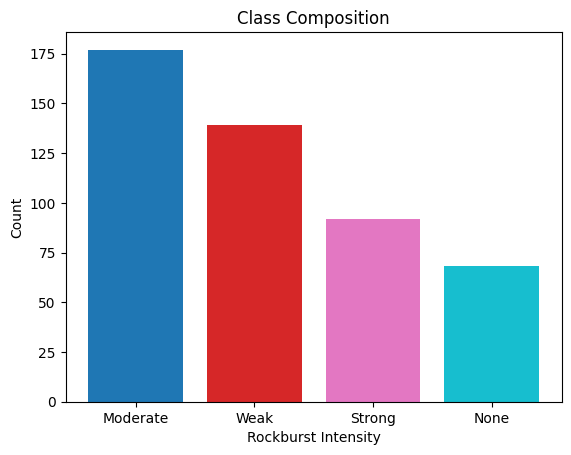

In [10]:
vc = data['Intensity'].value_counts()
colr = plt.cm.get_cmap('tab10', len(vc))

plt.bar(vc.index, vc.values, color=colr(np.arange(len(vc))))

plt.xlabel('Rockburst Intensity')
plt.ylabel('Count')
plt.title('Class Composition')

plt.show()

In [11]:
data.head()

,MTS,UCS,UTS,SC,RBC,ESI,Intensity
0,90.0,170.0,11.3,0.53,15.04,9.0,Moderate
1,90.0,220.0,7.4,0.41,29.73,7.3,Weak
2,62.6,165.0,9.4,0.38,17.55,9.0,Weak
3,55.4,176.0,7.3,0.31,24.11,9.3,Moderate
4,30.0,88.7,3.7,0.34,23.97,6.6,Moderate


In [12]:
# drop rows with missing values in column intensity
data.dropna(subset=['Intensity'], inplace=True)

# **PRE-PROCESSING**

In [13]:
#data imputation
data_imputed = data.copy()

In [14]:
cols_with_missing = data_imputed.columns[data_imputed.isna().any()].tolist()

# Loop over each column with missing data and perform median imputation
for col in cols_with_missing:
    mean_value = np.mean(data_imputed[col].dropna())
    data_imputed[col].fillna(mean_value, inplace=True)

In [15]:
def rb_occurence(df):
  if df['Intensity'] == 'Moderate':
    return 'Yes'
  if df['Intensity'] == 'Strong':
    return 'Yes'
  if df['Intensity'] == 'Weak':
    return 'Yes'
  else:
    return 'No'

data_imputed['Occurence'] = data_imputed.apply(rb_occurence, axis=1)

In [16]:
data_imputed.head(8)

,MTS,UCS,UTS,SC,RBC,ESI,Intensity,Occurence
0,90.00,170.0,11.3,0.53,15.04,9.0,Moderate,Yes
1,90.00,220.0,7.4,0.41,29.73,7.3,Weak,Yes
2,62.60,165.0,9.4,0.38,17.55,9.0,Weak,Yes
3,55.40,176.0,7.3,0.31,24.11,9.3,Moderate,Yes
4,30.00,88.7,3.7,0.34,23.97,6.6,Moderate,Yes
5,48.75,180.0,8.3,0.27,21.69,5.0,Moderate,Yes
6,80.00,180.0,6.7,0.44,26.87,5.5,Weak,Yes
7,89.00,236.0,8.3,0.38,28.43,5.0,Moderate,Yes


In [17]:
# List of columns to check for outliers
cols_to_check = ['MTS','UCS','UTS','SC','RBC','ESI']

# Create box plots for each column
for col in cols_to_check:
    # Calculate the IQR and upper and lower bounds for the column
    q1 = data_imputed[col].quantile(0.25)
    q3 = data_imputed[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    lower_bound = q1 - (1.5 * iqr)

    # Highlight the outliers
    outliers = data_imputed[(data_imputed[col] > upper_bound) | (data_imputed[col] < lower_bound)]
    num_outliers = len(outliers)
    print(f"Number of outliers in columns {col}: {num_outliers}")
    print(f"Rows with outliers : {outliers}")

Number of outliers in columns MTS: 26
Rows with outliers :         MTS     UCS    UTS    SC    RBC    ESI Intensity Occurence
119  120.80  151.60  10.10  0.80  15.01  20.00    Strong       Yes
120  119.32  138.60   7.74  0.86  17.91  30.00    Strong       Yes
123  127.60  145.42  13.70  0.88  10.61  10.00    Strong       Yes
124  126.41  158.03  14.32  0.80  11.04  10.00    Strong       Yes
145  225.50   86.30  15.60  2.61   5.53   6.30    Strong       Yes
146  225.50   61.10   5.30  3.69  11.53   7.20    Strong       Yes
147  225.50   99.20   7.30  2.27  13.59   8.31    Strong       Yes
148  225.50   91.30  14.50  2.47   6.30  21.00    Strong       Yes
149  274.30   86.30  15.60  3.18   5.53   6.30    Strong       Yes
150  274.30   61.10   5.30  4.49  11.53   7.20    Strong       Yes
151  274.30   99.20   7.30  2.77  13.59   8.31    Strong       Yes
152  274.30   91.30  14.50  3.00   6.30  21.00    Strong       Yes
153  297.80   86.30  15.60  3.45   5.53   6.30    Strong       Yes
154

In [18]:
data_clean = data_imputed.copy()

In [19]:
# define function to remove outliers using IQR
def remove_outliers(df, columns):
    result = df.copy()
    for feature_name in columns:
        Q1 = df[feature_name].quantile(0.25)
        Q3 = df[feature_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        result = result[(result[feature_name] >= lower_bound) & (result[feature_name] <= upper_bound)]
    return result

# apply outlier removal to selected columns
data_clean = remove_outliers(data_clean, ['MTS','UTS', 'UCS','SC','RBC','ESI'])

print(data_clean)

      MTS    UCS   UTS    SC    RBC  ESI Intensity Occurence
0    90.0  170.0  11.3  0.53  15.04  9.0  Moderate       Yes
1    90.0  220.0   7.4  0.41  29.73  7.3      Weak       Yes
2    62.6  165.0   9.4  0.38  17.55  9.0      Weak       Yes
3    55.4  176.0   7.3  0.31  24.11  9.3  Moderate       Yes
4    30.0   88.7   3.7  0.34  23.97  6.6  Moderate       Yes
..    ...    ...   ...   ...    ...  ...       ...       ...
471  27.8   90.0   2.1  0.31  42.80  1.8      None        No
472  30.3   88.0   3.1  0.34  28.30  3.0      Weak       Yes
474  41.6   67.6   2.7  0.61  25.00  3.7  Moderate       Yes
475  40.1   72.1   2.3  0.55  31.30  4.6  Moderate       Yes
476  58.2   83.6   2.6  0.69  32.10  5.9    Strong       Yes

[405 rows x 8 columns]


In [20]:
data_transformed = data_clean.copy()

In [21]:
# List of columns to normalize
cols_to_normalize = ['MTS', 'UCS', 'UTS', 'SC', 'RBC', 'ESI']

# Apply min-max normalization to each column
for col in cols_to_normalize:
    data_transformed[col] = (data_transformed[col] - data_transformed[col].min()) / (data_transformed[col].max() - data_transformed[col].min())

# Print the normalized DataFrame
print(data_transformed)

          MTS       UCS       UTS        SC       RBC       ESI Intensity  \
0    0.781474  0.700018  0.649227  0.435644  0.311680  0.811695  Moderate   
1    0.781474  0.930773  0.417360  0.316832  0.619111  0.643211      Weak   
2    0.536481  0.676943  0.536266  0.287129  0.364209  0.811695      Weak   
3    0.472103  0.727709  0.411415  0.217822  0.501496  0.841427  Moderate   
4    0.244993  0.324811  0.197384  0.247525  0.498566  0.573835  Moderate   
..        ...       ...       ...       ...       ...       ...       ...   
471  0.225322  0.330810  0.102259  0.217822  0.892640  0.098117      None   
472  0.247675  0.321580  0.161712  0.247525  0.589184  0.217047      Weak   
474  0.348712  0.227432  0.137931  0.514851  0.520122  0.286422  Moderate   
475  0.335300  0.248200  0.114150  0.455446  0.651968  0.375619  Moderate   
476  0.497139  0.301274  0.131986  0.594059  0.668711  0.504460    Strong   

    Occurence  
0         Yes  
1         Yes  
2         Yes  
3         Y

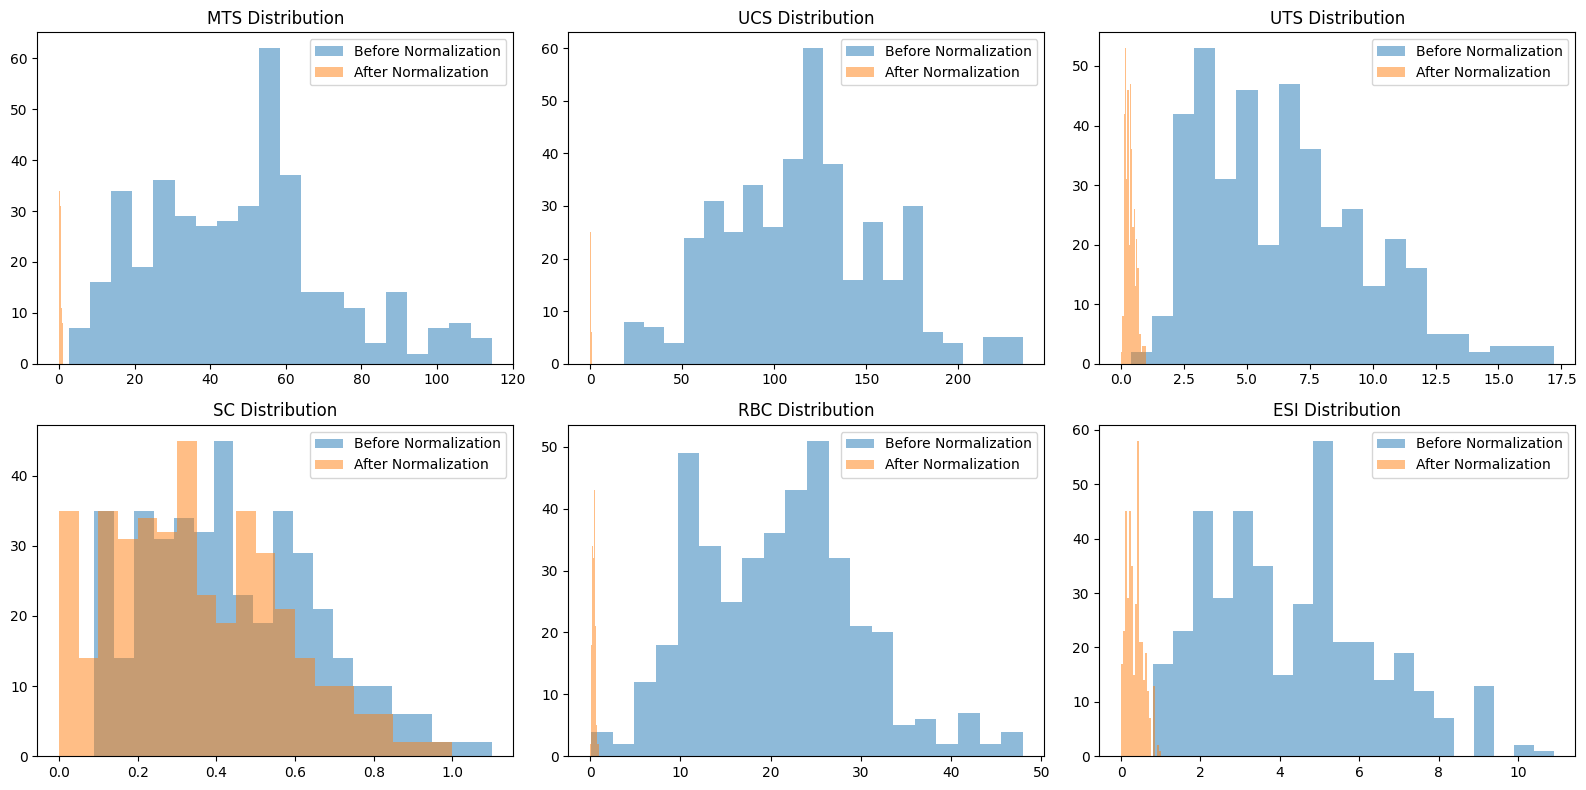

In [22]:
# Convert the data to pandas DataFrames for easier plotting
feature_columns = ['MTS', 'UCS', 'UTS', 'SC', 'RBC', 'ESI']
df_before = pd.DataFrame(data_clean, columns=feature_columns)
df_after = pd.DataFrame(data_transformed, columns=feature_columns)

# Create histograms for each feature before and after normalization
plt.figure(figsize=(16, 8))
for i, feature in enumerate(feature_columns):
    plt.subplot(2, 3, i + 1)
    plt.hist(df_before[feature], alpha=0.5, label='Before Normalization', bins=20)
    plt.hist(df_after[feature], alpha=0.5, label='After Normalization', bins=20)
    plt.title(f'{feature} Distribution')
    plt.legend()

plt.tight_layout()
plt.show()

In [23]:
data_model2 = data_transformed.loc[data_transformed['Occurence'] !='No']

In [24]:
X1 = data_transformed.drop(['Intensity','Occurence'], axis=1)
Y1 = data_transformed['Occurence']

X2 = data_model2.drop(['Intensity','Occurence'], axis=1)
Y2 = data_model2['Intensity']

In [25]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
import time

In [26]:
# Mapping dictionary
mapping = {'Yes': 1, 'No': 0}
mapping2 = {'Weak': 0, 'Moderate': 1, 'Strong': 2}

# Apply mapping to encode the target column
Y1 = [mapping[label] for label in Y1]
Y2 = [mapping2[label] for label in Y2]

# **MODEL 1 - Rockburst Events Classification**

## **GWO-SVM**

In [27]:
# split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

In [29]:
# Apply SMOTE only to the training set
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42, n_jobs=None)
X_train_smote, y_train_smote = smote.fit_resample(X1_train, y1_train)

In [ ]:
np.random.seed(42)

# Define the GWO class
class GWO:
    def __init__(self, n_iter, n_pop, n_dim, lb, ub, obj_func):
        self.n_iter = n_iter
        self.n_pop = n_pop
        self.n_dim = n_dim
        self.lb = lb
        self.ub = ub
        self.obj_func = obj_func
        self.alpha_pos = None
        self.beta_pos = None
        self.delta_pos = None
        self.alpha_score = np.inf
        self.beta_score = np.inf
        self.delta_score = np.inf
        self.pos = np.random.uniform(low=self.lb, high=self.ub, size=(self.n_pop, self.n_dim))

    def run(self):
        for t in range(self.n_iter):
            for i in range(self.n_pop):
                # Boundary checking
                self.pos[i] = np.clip(self.pos[i], self.lb, self.ub)

                # Calculate objective function value
                fitness = self.obj_func(self.pos[i])

                # Update alpha, beta, and delta
                if fitness < self.alpha_score:
                    self.alpha_score = fitness
                    self.alpha_pos = self.pos[i]
                elif fitness < self.beta_score:
                    self.beta_score = fitness
                    self.beta_pos = self.pos[i]
                elif fitness < self.delta_score:
                    self.delta_score = fitness
                    self.delta_pos = self.pos[i]

            # Update a, A, C, and D
            a = 2 - 2 * (t / self.n_iter)
            A = 2 * a * np.random.rand(self.n_dim) - a
            C = 2 * np.random.rand(self.n_dim)
            D = np.abs(C * self.alpha_pos - self.pos)

            # Update position
            self.pos = self.alpha_pos - A * D

        return self.alpha_pos

# Define the SVM objective function
def svm_obj_func(x):
    gamma, C = x
    clf = SVC(C=C, gamma=gamma, kernel='rbf')
    clf.fit(X_train_smote, y_train_smote)
    y_pred = clf.predict(X1_test)
    return 1 - accuracy_score(y1_test, y_pred)

# Define the GWO-SVM model
n_iter = 20
n_pop = 20
n_dim = 2
lb = [0.1, 1]
ub = [25, 50]

# Start the timer
start_time = time.time()

gwo_svm = GWO(n_iter=n_iter, n_pop=n_pop, n_dim=n_dim, lb=lb, ub=ub, obj_func=svm_obj_func)

# Train the model
best_params = gwo_svm.run()

# Fit the SVM model with the best hyperparameters
clf = SVC(C=best_params[1], gamma=best_params[0], kernel='rbf')
clf.fit(X_train_smote, y_train_smote)

# Evaluate the model on test data
y_pred = clf.predict(X1_test)
accuracy = accuracy_score(y1_test, y_pred)
precision = precision_score(y1_test, y_pred, average='macro')
recall = recall_score(y1_test, y_pred, average='macro')
f1 = f1_score(y1_test, y_pred, average='macro')
cm = confusion_matrix(y1_test, y_pred)

# Evaluate the model on training data
y_pred_train = clf.predict(X_train_smote)
accuracy_train = accuracy_score(y_train_smote, y_pred_train)
precision_train = precision_score(y_train_smote, y_pred_train, average='macro')
recall_train = recall_score(y_train_smote, y_pred_train, average='macro')
f1_train = f1_score(y_train_smote, y_pred_train, average='macro')
cm_train = confusion_matrix(y_train_smote, y_pred_train)

# Calculate the running time
running_time = time.time() - start_time

# Print metrics for test data
print(classification_report(y1_test, y_pred))
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Precision: {:.4f}%".format(precision * 100))
print("Recall: {:.4f}%".format(recall * 100))
print("F1-Score: {:.4f}%".format(f1 * 100))
print("Confusion Matrix:\n", cm)

# Print metrics for training data
print("\nTraining Data:")
print(classification_report(y_train_smote, y_pred_train))
print("Accuracy: {:.4f}%".format(accuracy_train * 100))
print("Precision: {:.4f}%".format(precision_train * 100))
print("Recall: {:.4f}%".format(recall_train * 100))
print("F1-Score: {:.4f}%".format(f1_train * 100))
print("Confusion Matrix:\n", cm_train)

print("Running Time: {:.2f} seconds".format(running_time))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.97      0.98        65

    accuracy                           0.98        81
   macro avg       0.94      0.98      0.96        81
weighted avg       0.98      0.98      0.98        81

Accuracy: 97.5309%
Precision: 94.4444%
Recall: 98.4615%
F1-Score: 96.2776%
Confusion Matrix:
 [[16  0]
 [ 2 63]]

Training Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       275
           1       1.00      0.95      0.97       275

    accuracy                           0.97       550
   macro avg       0.98      0.97      0.97       550
weighted avg       0.98      0.97      0.97       550

Accuracy: 97.4545%
Precision: 97.5779%
Recall: 97.4545%
F1-Score: 97.4529%
Confusion Matrix:
 [[275   0]
 [ 14 261]]
Running Time: 6.98 seconds


## **XGBoost**

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.97      0.98        65

    accuracy                           0.98        81
   macro avg       0.94      0.98      0.96        81
weighted avg       0.98      0.98      0.98        81

Accuracy: 97.5309%
Precision: 94.4444%
Recall: 98.4615%
F1-Score: 96.2776%
Confusion Matrix:
 [[16  0]
 [ 2 63]]

Training Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       275
           1       1.00      0.97      0.99       275

    accuracy                           0.99       550
   macro avg       0.99      0.99      0.99       550
weighted avg       0.99      0.99      0.99       550

Accuracy: 98.5455%
Precision: 98.5686%
Recall: 98.5455%
F1-Score: 98.5453%
Confusion Matrix:
 [[274   1]
 [  7 268]]


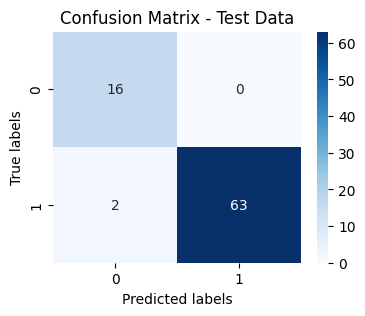

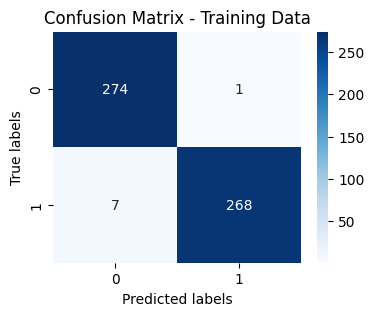

Running Time: 0.5098 seconds


In [ ]:
np.random.seed(42)

# Define the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 1.5,
    'max_depth': 6,
    'min_child_weight': 2,
    'gamma': 0,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'alpha': 1,
    'lambda': 1,
    'seed': 42
}

# Convert the data into XGBoost DMatrix format
dtrain = xgb.DMatrix(X_train_smote, label=y_train_smote)
dtest = xgb.DMatrix(X1_test, label=y1_test)

start_time = time.time()  # Start measuring the running time

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Predict the labels of the testing set
y_pred = bst.predict(dtest)
y_pred = [int(round(x)) for x in y_pred]

# Compute the accuracy of the classifier
accuracy = accuracy_score(y1_test, y_pred)
precision = precision_score(y1_test, y_pred, average='macro')
recall = recall_score(y1_test, y_pred, average='macro')
f1 = f1_score(y1_test, y_pred, average='macro')
cm = confusion_matrix(y1_test, y_pred)

# Predict the labels of the training set
y_pred_train = bst.predict(dtrain)
y_pred_train = [int(round(x)) for x in y_pred_train]

# Compute the metrics for training data
accuracy_train = accuracy_score(y_train_smote, y_pred_train)
precision_train = precision_score(y_train_smote, y_pred_train, average='macro')
recall_train = recall_score(y_train_smote, y_pred_train, average='macro')
f1_train = f1_score(y_train_smote, y_pred_train, average='macro')
cm_train = confusion_matrix(y_train_smote, y_pred_train)

# Print metrics for test data
print(classification_report(y1_test, y_pred))
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Precision: {:.4f}%".format(precision * 100))
print("Recall: {:.4f}%".format(recall * 100))
print("F1-Score: {:.4f}%".format(f1 * 100))
print("Confusion Matrix:\n", cm)

# Print metrics for training data
print("\nTraining Data:")
print(classification_report(y_train_smote, y_pred_train))
print("Accuracy: {:.4f}%".format(accuracy_train * 100))
print("Precision: {:.4f}%".format(precision_train * 100))
print("Recall: {:.4f}%".format(recall_train * 100))
print("F1-Score: {:.4f}%".format(f1_train * 100))
print("Confusion Matrix:\n", cm_train)

# Plot colorful confusion matrix for test data
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Data')
plt.show()

# Plot colorful confusion matrix for training data
plt.figure(figsize=(4, 3))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Training Data')
plt.show()

end_time = time.time()  # Stop measuring the running time
running_time = end_time - start_time
print("Running Time: {:.4f} seconds".format(running_time))

# **MODEL 2 - Rockburst Intensity Classification**

## **GWO-SVM**

In [ ]:
 # split the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.1, random_state=42)

In [ ]:
# Apply SMOTE only to the training set
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42, n_jobs=None)
X2_train_smote, y2_train_smote = smote.fit_resample(X2_train, y2_train)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.92      0.75      0.83        16
           2       0.67      1.00      0.80         4

    accuracy                           0.85        34
   macro avg       0.82      0.89      0.84        34
weighted avg       0.87      0.85      0.85        34

Accuracy: 85.2941%
Precision: 81.8803%
Recall: 89.2857%
F1-Score: 84.1379%
Confusion Matrix:
 [[13  1  0]
 [ 2 12  2]
 [ 0  0  4]]

Training Data:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       135
           1       0.85      0.84      0.85       135
           2       0.90      0.91      0.90       135

    accuracy                           0.89       405
   macro avg       0.89      0.89      0.89       405
weighted avg       0.89      0.89      0.89       405

Accuracy: 89.1358%
Precision: 89.1310%
Recall: 89.1358%
F1-Score: 89.1309%
Confusion Matrix

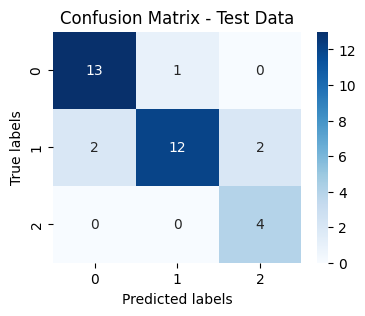

Execution Time: 9.70 seconds


In [ ]:
np.random.seed(42)

# Define the GWO class
class GWO:
    def __init__(self, n_iter, n_pop, n_dim, lb, ub, obj_func):
        self.n_iter = n_iter
        self.n_pop = n_pop
        self.n_dim = n_dim
        self.lb = lb
        self.ub = ub
        self.obj_func = obj_func
        self.alpha_pos = None
        self.beta_pos = None
        self.delta_pos = None
        self.alpha_score = np.inf
        self.beta_score = np.inf
        self.delta_score = np.inf
        self.pos = np.random.uniform(low=self.lb, high=self.ub, size=(self.n_pop, self.n_dim))

    def run(self):
        for t in range(self.n_iter):
            for i in range(self.n_pop):
                # Boundary checking
                self.pos[i] = np.clip(self.pos[i], self.lb, self.ub)

                # Calculate objective function value
                fitness = self.obj_func(self.pos[i])

                # Update alpha, beta, and delta
                if fitness < self.alpha_score:
                    self.alpha_score = fitness
                    self.alpha_pos = self.pos[i]
                elif fitness < self.beta_score:
                    self.beta_score = fitness
                    self.beta_pos = self.pos[i]
                elif fitness < self.delta_score:
                    self.delta_score = fitness
                    self.delta_pos = self.pos[i]

            # Update a, A, C, and D
            a = 2 - 2 * (t / self.n_iter)
            A = 2 * a * np.random.rand(self.n_dim) - a
            C = 2 * np.random.rand(self.n_dim)
            D = np.abs(C * self.alpha_pos - self.pos)

            # Update position
            self.pos = self.alpha_pos - A * D

        return self.alpha_pos

# Define the SVM objective function
def svm_obj_func(x):
    gamma, C = x
    clf = SVC(C=C, gamma=gamma, kernel='rbf')
    clf.fit(X2_train_smote, y2_train_smote)
    y_pred = clf.predict(X2_test)
    return 1 - accuracy_score(y2_test, y_pred)

# Define the GWO-SVM model
n_iter = 20
n_pop = 20
n_dim = 2
lb = [0.1, 1]
ub = [25, 50]

start_time = time.time()

gwo_svm = GWO(n_iter=n_iter, n_pop=n_pop, n_dim=n_dim, lb=lb, ub=ub, obj_func=svm_obj_func)

# Train the model
best_params = gwo_svm.run()

# Fit the SVM model with the best hyperparameters
clf = SVC(C=best_params[1], gamma=best_params[0], kernel='rbf')
clf.fit(X2_train_smote, y2_train_smote)

# Evaluate the model on test data
y_pred = clf.predict(X2_test)
accuracy = accuracy_score(y2_test, y_pred)
precision = precision_score(y2_test, y_pred, average='macro')
recall = recall_score(y2_test, y_pred, average='macro')
f1 = f1_score(y2_test, y_pred, average='macro')
cm = confusion_matrix(y2_test, y_pred)

# Evaluate the model on training data
y_pred_train = clf.predict(X2_train_smote)
accuracy_train = accuracy_score(y2_train_smote, y_pred_train)
precision_train = precision_score(y2_train_smote, y_pred_train, average='macro')
recall_train = recall_score(y2_train_smote, y_pred_train, average='macro')
f1_train = f1_score(y2_train_smote, y_pred_train, average='macro')
cm_train = confusion_matrix(y2_train_smote, y_pred_train)

end_time = time.time()
execution_time = end_time - start_time

# Print metrics for test data
print(classification_report(y2_test, y_pred))
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Precision: {:.4f}%".format(precision * 100))
print("Recall: {:.4f}%".format(recall * 100))
print("F1-Score: {:.4f}%".format(f1 * 100))
print("Confusion Matrix:\n", cm)

# Print metrics for training data
print("\nTraining Data:")
print(classification_report(y2_train_smote, y_pred_train))
print("Accuracy: {:.4f}%".format(accuracy_train * 100))
print("Precision: {:.4f}%".format(precision_train * 100))
print("Recall: {:.4f}%".format(recall_train * 100))
print("F1-Score: {:.4f}%".format(f1_train * 100))
print("Confusion Matrix:\n", cm_train)

# Plot colorful confusion matrix for test data
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Test Data')
plt.show()

print("Execution Time: {:.2f} seconds".format(execution_time))

## **XGBoost**

In [ ]:
# Define the XGBoost parameters

params = {
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'num_class': 3,
    'eta': 1.5,
    'max_depth': 6,
    'min_child_weight': 2,
    'gamma': 0,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'alpha': 1,
    'lambda': 1,
    'seed': 42
}

# Convert the data into XGBoost DMatrix format
dtrain = xgb.DMatrix(X2_train_smote, label=y2_train_smote)
dtest = xgb.DMatrix(X2_test, label=y2_test)

start_time = time.time()  # Start measuring the running time

# Train the XGBoost model
num_round = 100
bst = xgb.train(params, dtrain, num_round)

# Predict the labels of the testing set
y_pred = bst.predict(dtest)
y_pred = [int(round(x)) for x in y_pred]

# Compute the accuracy of the classifier
accuracy = accuracy_score(y2_test, y_pred)
precision = precision_score(y2_test, y_pred, average='macro')
recall = recall_score(y2_test, y_pred, average='macro')
f1 = f1_score(y2_test, y_pred, average='macro')
cm = confusion_matrix(y2_test, y_pred)

# Predict the labels of the training set
y_pred_train = bst.predict(dtrain)
y_pred_train = [int(round(x)) for x in y_pred_train]

# Compute the metrics for training data
accuracy_train = accuracy_score(y2_train_smote, y_pred_train)
precision_train = precision_score(y2_train_smote, y_pred_train, average='macro')
recall_train = recall_score(y2_train_smote, y_pred_train, average='macro')
f1_train = f1_score(y2_train_smote, y_pred_train, average='macro')
cm_train = confusion_matrix(y2_train_smote, y_pred_train)

#Print metrics for test data
print(classification_report(y2_test, y_pred))
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Precision: {:.4f}%".format(precision * 100))
print("Recall: {:.4f}%".format(recall * 100))
print("F1-Score: {:.4f}%".format(f1 * 100))
print("Confusion Matrix:\n", cm)

# Print metrics for training data
print("\nTraining Data:")
print(classification_report(y2_train_smote, y_pred_train))
print("Accuracy: {:.4f}%".format(accuracy_train * 100))
print("Precision: {:.4f}%".format(precision_train * 100))
print("Recall: {:.4f}%".format(recall_train * 100))
print("F1-Score: {:.4f}%".format(f1_train * 100))
print("Confusion Matrix:\n", cm_train)

end_time = time.time()  # Stop measuring the running time
running_time = end_time - start_time
print("Running Time: {:.4f} seconds".format(running_time))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      0.81      0.87        16
           2       0.67      1.00      0.80         4

    accuracy                           0.88        34
   macro avg       0.84      0.91      0.87        34
weighted avg       0.90      0.88      0.88        34

Accuracy: 88.2353%
Precision: 84.1270%
Recall: 91.3690%
F1-Score: 86.5079%
Confusion Matrix:
 [[13  1  0]
 [ 1 13  2]
 [ 0  0  4]]

Training Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       135
           1       0.99      0.99      0.99       135
           2       1.00      0.99      1.00       135

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405

Accuracy: 99.5062%
Precision: 99.5080%
Recall: 99.5062%
F1-Score: 99.5062%
Confusion Matrix

# **CONCLUSION**

1. In both classifications, GWO-SVM and XGBoost performed very well. For rockburst events classification with training data 80%, both models achieved 97.53% accuracy, 94.44% precision, 98.46% recall, and 96.28% F1-score. Both models were able to predict the yes rockburst class well compared to the other class.

2. For rockburst intensity classification with 90% training data, XGBoost outperforms GWO-SVM in terms of accuracy, recall, F1 score, and running time. Both models were able to predict the weak intensity class well compared to the other classes.